# Analyzing CIA World Factbook Data Using SQL

[CIA World Factbook](https://www.cia.gov/the-world-factbook/) is a compendium of statistics about all of the countries on Earth. 

It provides basic intelligence on the history, people, government, economy, energy, geography, environment, communications, transportation, military, terrorism, and transnational issues for 266 world entities. 

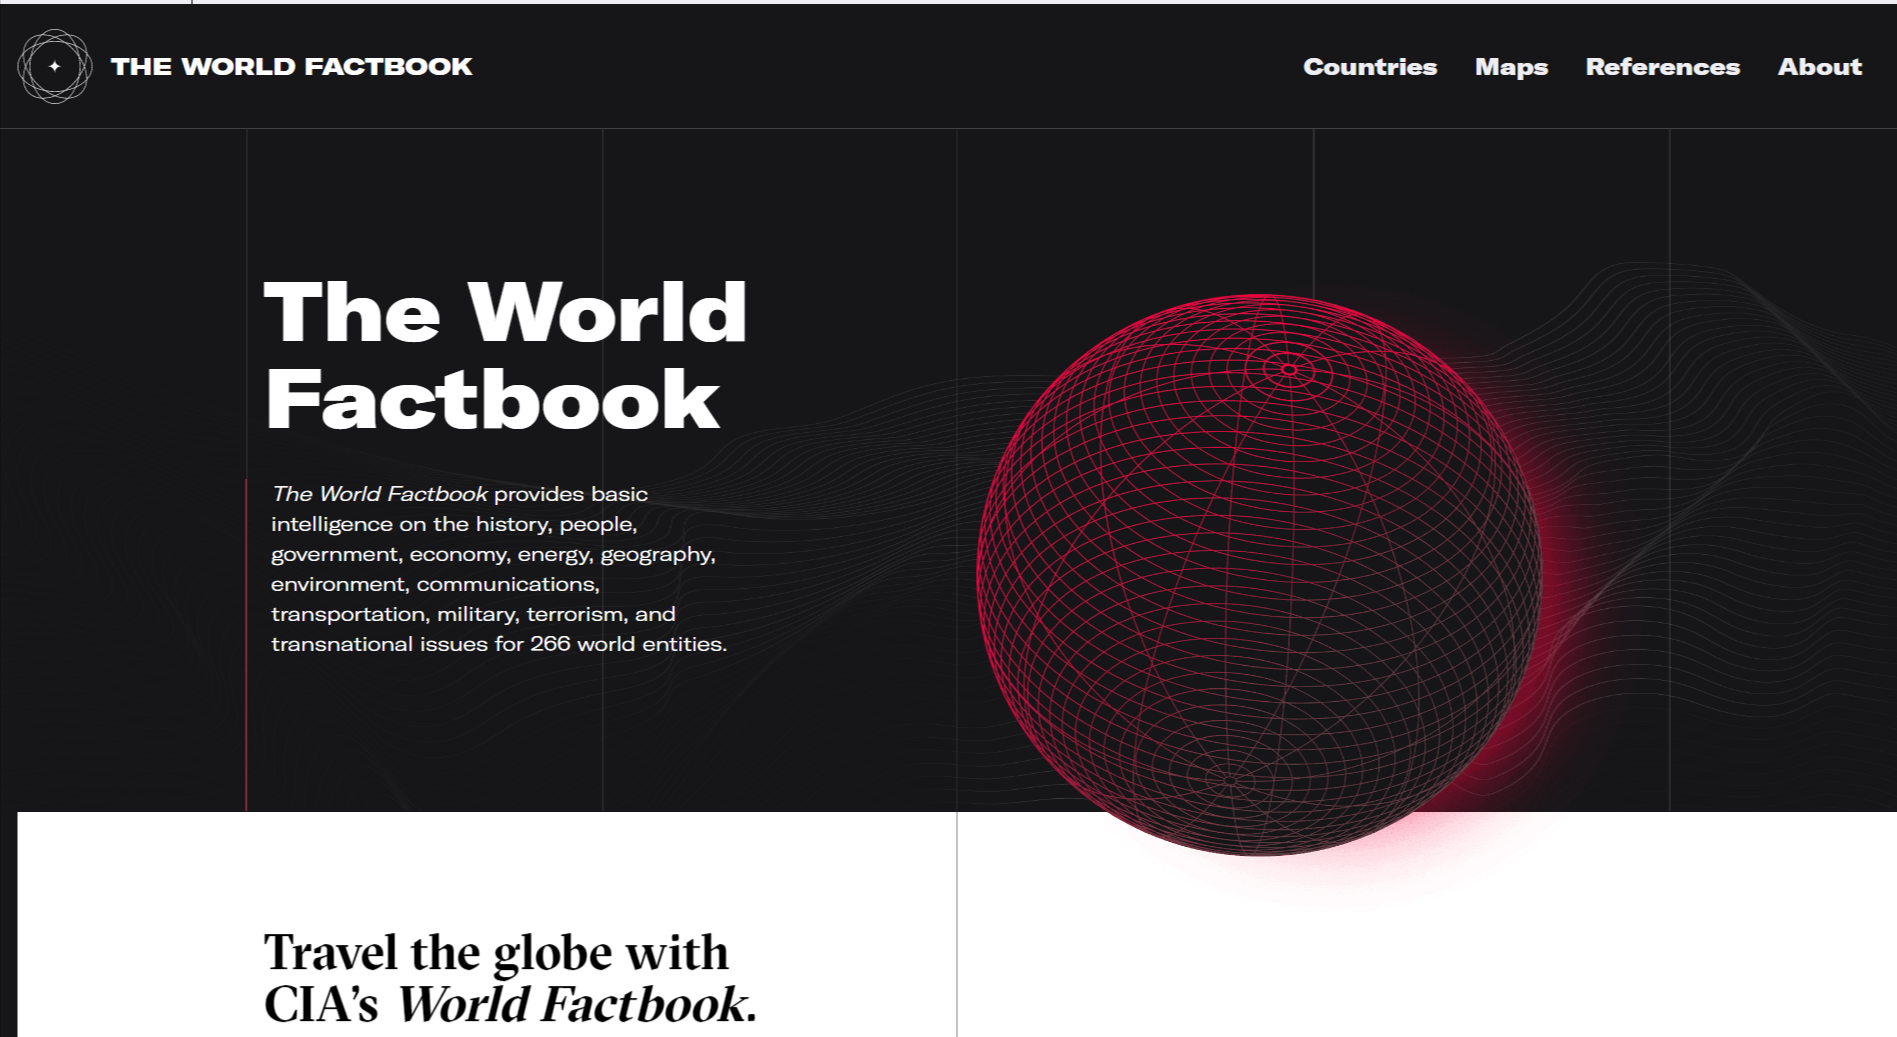<br>

In this project, we'll be working with the **demographic information** like the following: <br>

**`population`** — the global population <br>
**`population_growth`** — the annual population growth rate, as a percentage.<br>
**`area`** — the total land and water area.

We'll use SQL to analyze the data from this [database](https://dsserver-prod-resources-1.s3.amazonaws.com/257/factbook.db). 

The code below helps us to establish a connection between Jupyter Notebook and the database file.

In [1]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

Let's have a look at the table we are going to be working with in this project.

In [2]:
%%sql
SELECT *
FROM sqlite_master
WHERE type='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


The table we are going to be working with is called **facts**. Now that we know the name of the table, we'll explore the first five rows of the facts table.

In [3]:
%%sql
SELECT *
FROM facts
LIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Overview of the data

Now that we have seen the first 5 rows of the data, let's write the description of the columns.

`name` — the name of the country.<br>
`area`— the country's total area (both land and water).<br>
`area_land` — the country's land area in square kilometers.<br>
`area_water` — the country's water area in square kilometers.<br>
`population` — the country's population.<br>
`population_growth` — the country's population growth as a percentage.<br>
`birth_rate` — the country's birth rate, or the number of births per year per 1,000 people.<br>
`death_rate` — the country's death rate, or the number of death per year per 1,000 people.<br>

# Data Exploration

We will begin exploring the data by finding out answers to a few questions like:
1. What is the minimum population?
2. What is the the maximum population?
3. What is the minimum population growth?
4. What is the maximum population growth?

### Minimum population

In [4]:
%%sql
SELECT name, min(population) as population
FROM facts;

 * sqlite:///factbook.db
Done.


name,population
Antarctica,0


We have got **Antarctica** - a continent - with a population of **0**. 

### Maximum population

In [5]:
%%sql
SELECT name, max(population) as population
FROM facts;

 * sqlite:///factbook.db
Done.


name,population
World,7256490011


The maximum population shows the **worlds overall population**  of **7256490011**.

### Minimum population growth

In [6]:
%%sql
SELECT name, min(population_growth) as min_population_growth
FROM facts;

 * sqlite:///factbook.db
Done.


name,min_population_growth
Holy See (Vatican City),0.0


The country with the minimum population growth **Holy See (Vatican City)** with no population growth - **0%**.

### Maximum population growth 

In [7]:
%%sql
SELECT name, max(population_growth) as max_population_growth
FROM facts;

 * sqlite:///factbook.db
Done.


name,max_population_growth
South Sudan,4.02


The country with the max population growth is **South Sudan** with a growth percentage of **4.02%**

# Exploring Outliers

We saw that there were a few outliers when exploring the data with few summary statistics.

* There's a country with a population of 0
* There's a country with a population of 7256490011 (or more than 7.2 billion people)

The table contains a row for the whole world, which explains the population of over 7.2 billion. And the table also contains a row for Antartica, which explains the population of 0.

Now that we know the outliers, let's recalculate the summary statistics - this time excluding the row for the whole world. We will only calculate the country with the maximum population, because that's the only outlier here. As it makes sense, Antarctica having zero population, since nobody lives there.

In [8]:
%%sql
SELECT name, max(population) as max_population
FROM facts
WHERE name != 'World';

 * sqlite:///factbook.db
Done.


name,max_population
China,1367485388


The country with maximum population is **China** with almost **1.3 billion** people.

# Average Population and Area

Let's explore density. Density depends on the population and the country's area. Let's look at the average values for these two columns. 

We will again not include the worlds total population.

In [9]:
%%sql
SELECT AVG(population) as avg_population,
       AVG(area) as avg_area
FROM facts
WHERE name != 'World';

 * sqlite:///factbook.db
Done.


avg_population,avg_area
32242666.56846473,555093.546184739


We see that the average population is around **32 million** and the average area is **555 thousand square kilometers.**

# Densely Populated Countries

To finish the analysis, we wil identify the countries that have the following:
* Above-average values for population
* Below-average values for area

Basically, countries having more population with less area.

In [10]:
%%sql
SELECT * 
FROM facts
WHERE population > (SELECT AVG(population) FROM facts WHERE name != 'World') AND
      area < (SELECT AVG(area) FROM facts WHERE name != 'World');

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
14,bg,Bangladesh,148460,130170,18290,168957745,1.6,21.14,5.61,0.46
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
80,iz,Iraq,438317,437367,950,37056169,2.93,31.45,3.77,1.62
83,it,Italy,301340,294140,7200,61855120,0.27,8.74,10.19,4.1
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0
91,ks,"Korea, South",99720,96920,2800,49115196,0.14,8.19,6.75,0.0
120,mo,Morocco,446550,446300,250,33322699,1.0,18.2,4.81,3.36
138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
139,pl,Poland,312685,304255,8430,38562189,0.09,9.74,10.19,0.46
163,sp,Spain,505370,498980,6390,48146134,0.89,9.64,9.04,8.31


Looking at the countries names, we can say that in terms of population, they are densely populated. So, our output is right. 

# Conclusion

* We found summary statistics like minimum population, maximum population, minimum population growth, maximum population growth for the countries in the tables.
* We found the outliers and re-evaluated the summary statistics to ensure that we obtain accurate results.
* We looked at densely populated countries in the end.